<a href="https://colab.research.google.com/github/kaaanishk/face-detection-optimised/blob/master/combined-notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Preprocessing**

In [0]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

from google.colab.patches import cv2_imshow

img = cv2.imread("1.jpg")
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
img_yuv2 = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

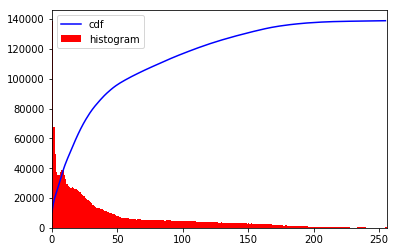

In [0]:
#basic
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()


#plot
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.savefig('basic_hist.png', bbox_inches = 'tight')
plt.show()

**Histogram Equalization**

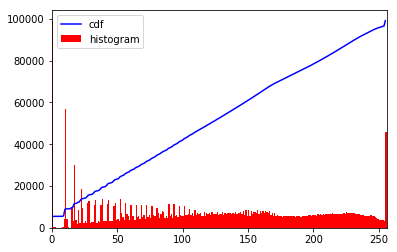

In [0]:
#histogram equalisation
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
img_eq_hist = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)


#plot
hist, bins = np.histogram(img_eq_hist.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img_eq_hist.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.savefig('basic_eq_hist.png', bbox_inches = 'tight')
plt.show()


**CLAHE (Adaptive Histogram Equalisation)**

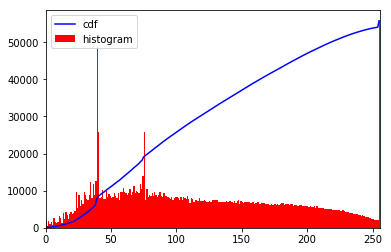

In [0]:
#clahe
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
lab_planes = cv2.split(lab)
clahe = cv2.createCLAHE()
lab_planes[0] = clahe.apply(lab_planes[0])
lab = cv2.merge(lab_planes)
img_clahe = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)


#plot
hist, bins = np.histogram(img_clahe.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img_clahe.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.savefig('clahe.png', bbox_inches = 'tight')
plt.show()

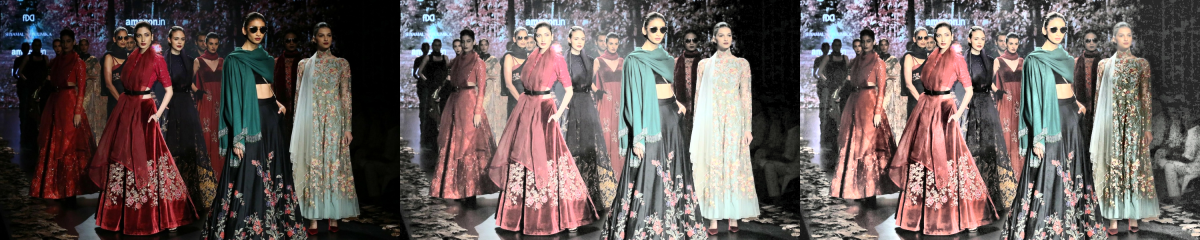

In [0]:
#compiled difference
res = np.hstack((img, img_eq_hist, img_clahe))
r = 1200.0 / res.shape[1]
dim = (1200, int(res.shape[0] * r))
resized = cv2.resize(res, dim, interpolation = cv2.INTER_AREA)
cv2_imshow(resized)

In [0]:
!pip install mtcnn

In [0]:
from mtcnn.mtcnn import MTCNN
mtcnn = MTCNN()

# **Face Detection Test 1**

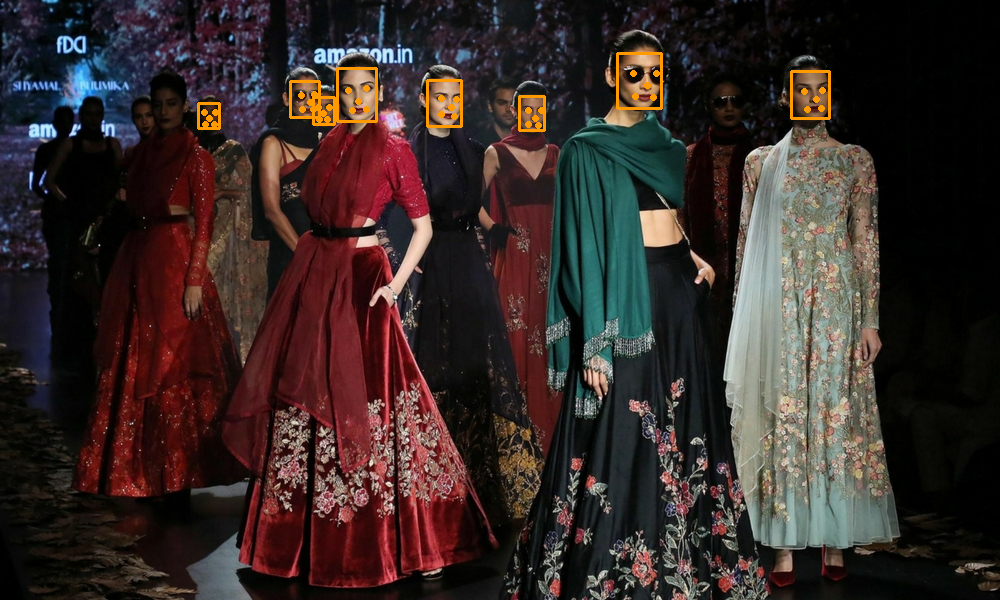

In [0]:
#basic face detection
result = mtcnn.detect_faces(img)

for i in range(0,len(result)):
  bounding_box = result[i]['box']
  keypoints = result[i]['keypoints']

  cv2.rectangle(img,
                (bounding_box[0],  bounding_box[1]),
                (bounding_box[0] + bounding_box[2],
                 bounding_box[1] + bounding_box[3]),
                (0,155,255), 2)
  cv2.circle(img,(keypoints['left_eye']), 2, (0,155,255), 2)
  cv2.circle(img,(keypoints['right_eye']), 2, (0,155,255), 2)
  cv2.circle(img,(keypoints['nose']), 2, (0,155,255), 2)
  cv2.circle(img,(keypoints['mouth_left']), 2, (0,155,255), 2)
  cv2.circle(img,(keypoints['mouth_right']), 2, (0,155,255), 2)

  
cv2.imwrite("1_drawn.jpg", img)
cv2_imshow(img)

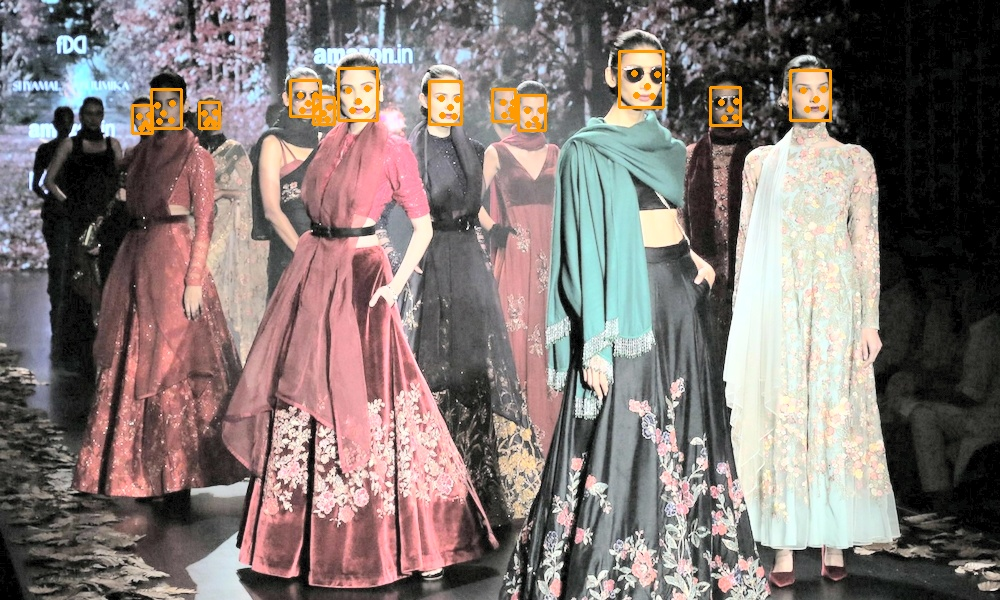

In [0]:
#histogram equalisation
result_eq_hist = mtcnn.detect_faces(img_eq_hist)


for i in range(0,len(result_eq_hist)):
  bounding_box = result_eq_hist[i]['box']
  keypoints = result_eq_hist[i]['keypoints']

  cv2.rectangle(img_eq_hist,
                (bounding_box[0],  bounding_box[1]),
                (bounding_box[0] + bounding_box[2],
                 bounding_box[1] + bounding_box[3]),
                (0,155,255), 2)
  cv2.circle(img_eq_hist,(keypoints['left_eye']), 2, (0,155,255), 2)
  cv2.circle(img_eq_hist,(keypoints['right_eye']), 2, (0,155,255), 2)
  cv2.circle(img_eq_hist,(keypoints['nose']), 2, (0,155,255), 2)
  cv2.circle(img_eq_hist,(keypoints['mouth_left']), 2, (0,155,255), 2)
  cv2.circle(img_eq_hist,(keypoints['mouth_right']), 2, (0,155,255), 2)
  
cv2.imwrite("2_drawn.jpg", img_eq_hist)
cv2_imshow(cv2.imread("2_drawn.jpg"))

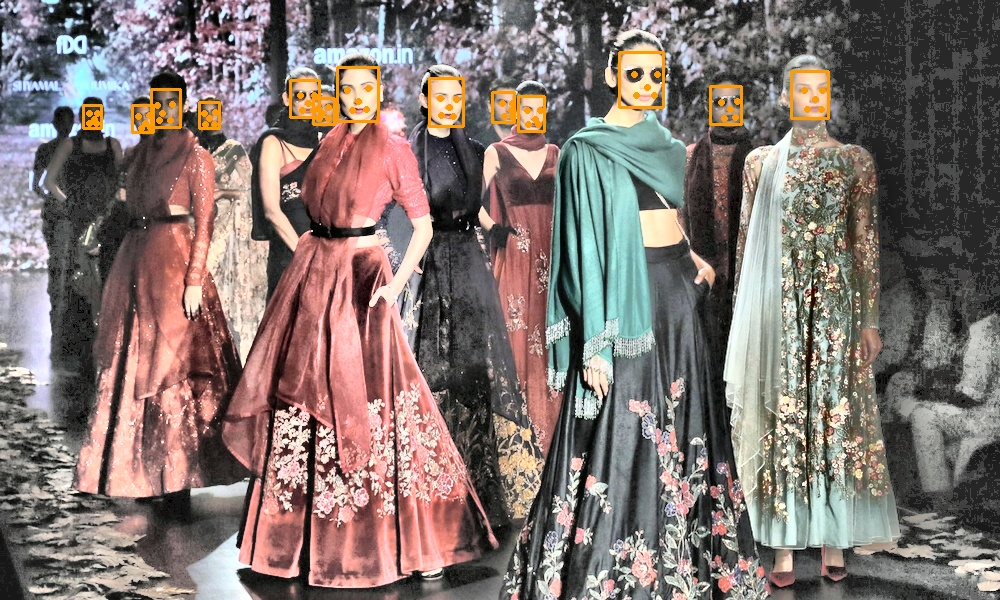

In [0]:
#clahe
result_clahe = mtcnn.detect_faces(img_clahe)


for i in range(0,len(result_clahe)):
  bounding_box = result_clahe[i]['box']
  keypoints = result_clahe[i]['keypoints']

  cv2.rectangle(img_clahe,
                (bounding_box[0],  bounding_box[1]),
                (bounding_box[0] + bounding_box[2],
                 bounding_box[1] + bounding_box[3]),
                (0,155,255), 2)
  cv2.circle(img_clahe,(keypoints['left_eye']), 2, (0,155,255), 2)
  cv2.circle(img_clahe,(keypoints['right_eye']), 2, (0,155,255), 2)
  cv2.circle(img_clahe,(keypoints['nose']), 2, (0,155,255), 2)
  cv2.circle(img_clahe,(keypoints['mouth_left']), 2, (0,155,255), 2)
  cv2.circle(img_clahe,(keypoints['mouth_right']), 2, (0,155,255), 2)
  
cv2.imwrite("3_drawn.jpg", img_clahe)
cv2_imshow(cv2.imread("3_drawn.jpg"))

# **FaceDetection Test 2**

In [0]:
img_clahe